<a href="https://colab.research.google.com/github/omkar2711/Blog_Web1/blob/main/Copy_of_JRT_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Student Performance Report
This report categorizes student performance based on three key skill areas: Technical, Verbal, and Aptitude scores. By analyzing each section individually, this report identifies students’ strengths and potential areas for improvement.

The purpose of this breakdown is to offer a clear understanding of where students excel and where they may benefit from additional support.

Performance is highlighted for the top 25% and bottom 25% of students in each section to provide insights into overall trends, group strengths, and specific skill gaps.

Through this analysis, we aim to guide targeted educational interventions and support mechanisms that will enhance students’ learning outcomes.

In [ ]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


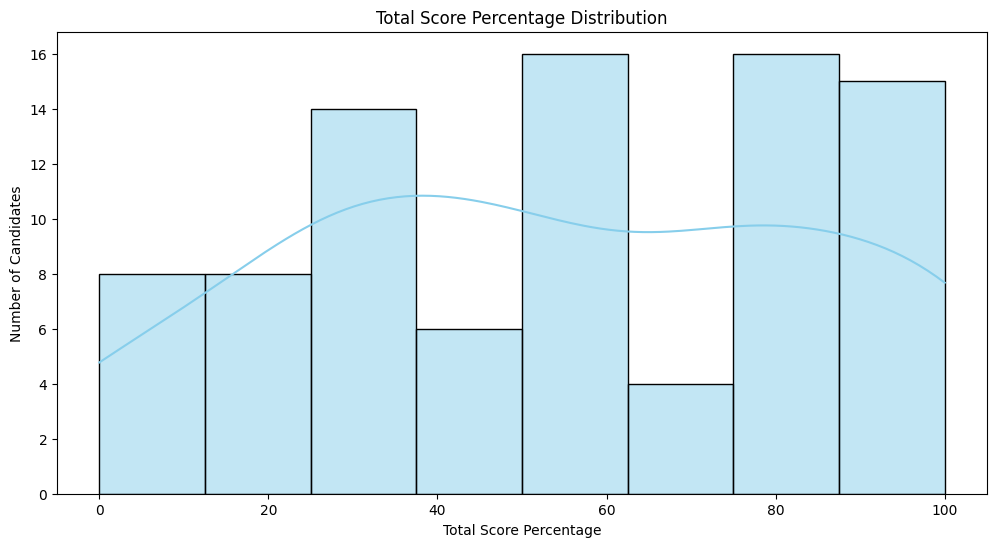

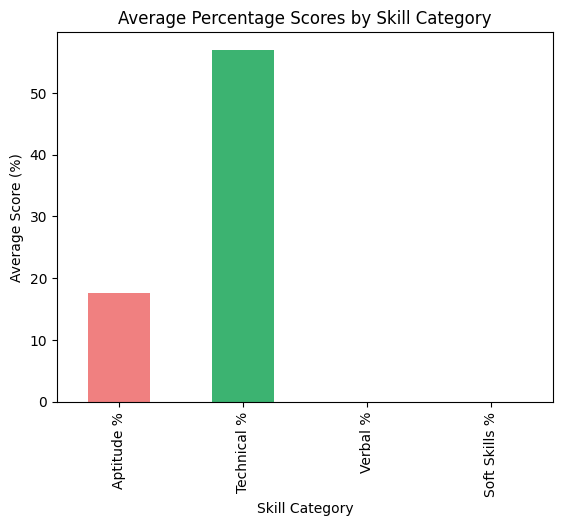

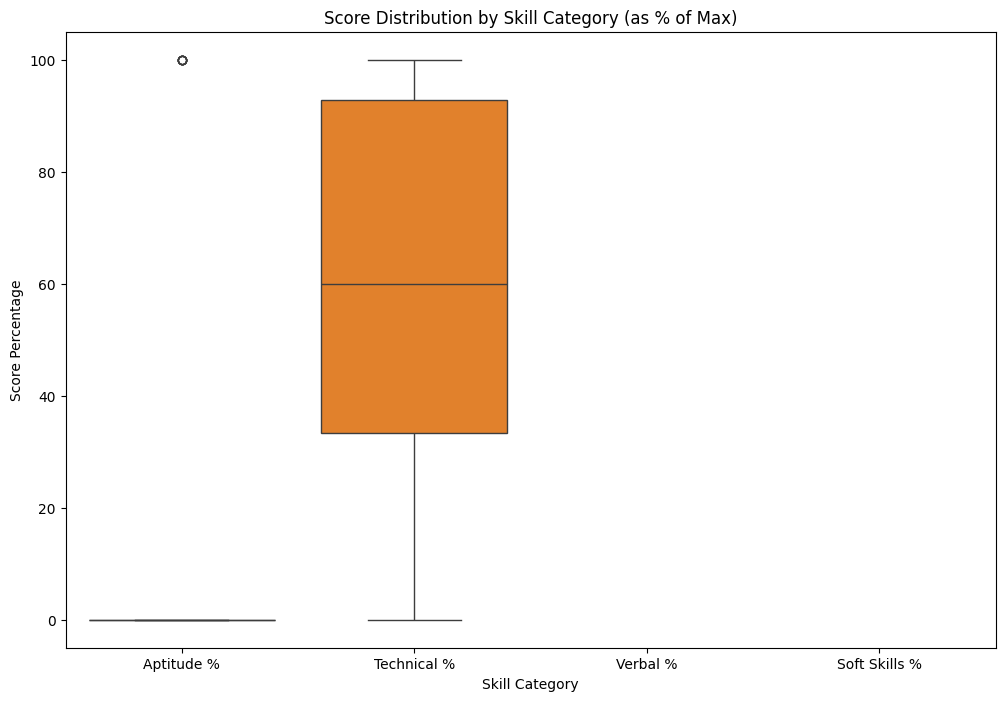

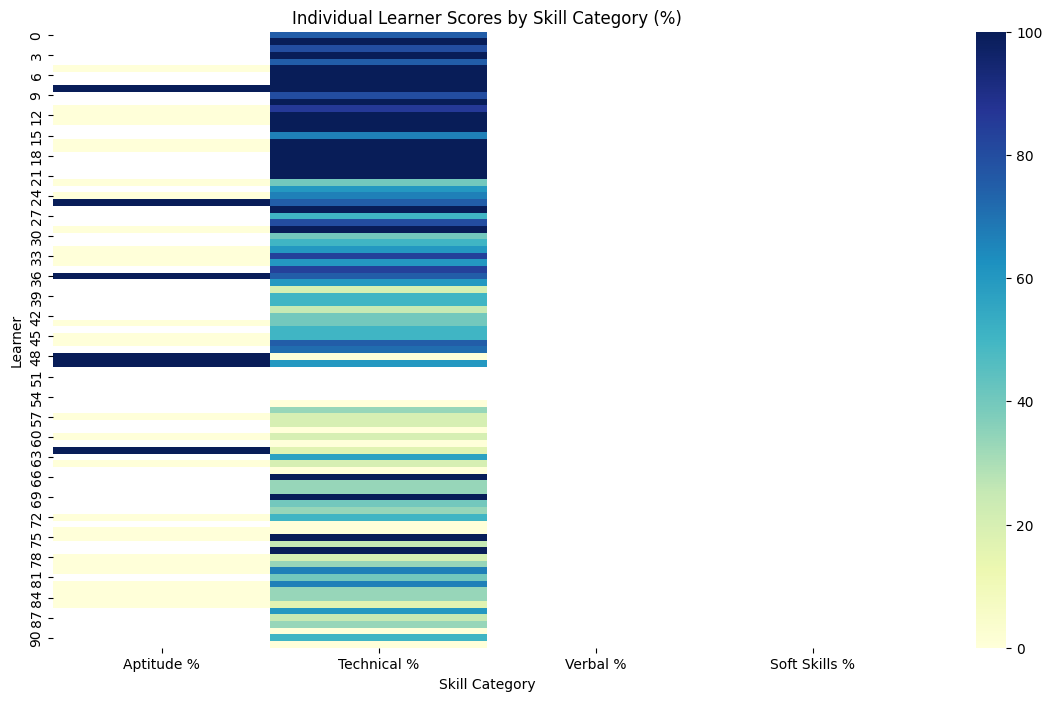

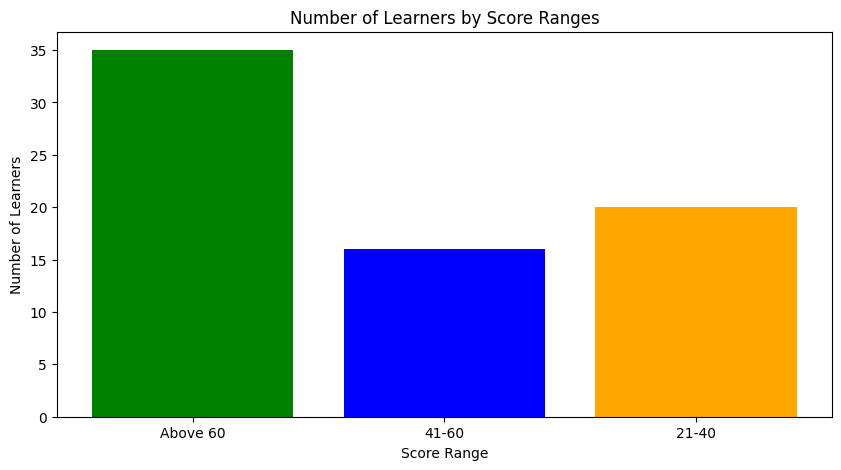

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_excel('/content/report-upgrad-job-readiness-test-mobile-for-ms-college-2024-11-20-problemwise.xlsx')

# Define Skill Category Mappings
skill_categories = {
    "Aptitude": {
        "columns": [
            "logical reasoning(Multiple-choice) - Candidate Score",
            "logical reasoning(Multiple-choice) - Candidate Score.1",
            "Basic mathematics(Multiple-choice) - Candidate Score",
            "Basic mathematics(Multiple-choice) - Candidate Score.1",
            "Probability(Multiple-choice) - Candidate Score",
            "Data Interpretation(Multiple-choice) - Candidate Score",
            "Data Interpretation(Multiple-choice) - Candidate Score.1",
            "Data Interpretation(Multiple-choice) - Candidate Score.2",
            "Data Interpretation(Multiple-choice) - Candidate Score.3",
            "Data Interpretation(Multiple-choice) - Candidate Score.4",
        ],
        "max_columns": [
            "logical reasoning(Multiple-choice) - Max Score",
            "logical reasoning(Multiple-choice) - Max Score.1",
            "Basic mathematics(Multiple-choice) - Max Score",
            "Basic mathematics(Multiple-choice) - Max Score.1",
            "Probability(Multiple-choice) - Max Score",
            "Data Interpretation(Multiple-choice) - Max Score",
            "Data Interpretation(Multiple-choice) - Max Score.1",
            "Data Interpretation(Multiple-choice) - Max Score.2",
            "Data Interpretation(Multiple-choice) - Max Score.3",
            "Data Interpretation(Multiple-choice) - Max Score.4",
        ],
    },
    "Technical": {
        "columns": [
            "Pseudocode logic(Multiple-choice) - Candidate Score",
            "Search Algorithms(Multiple-choice) - Candidate Score",
            "Networking(Multiple-choice) - Candidate Score",
            "Networking(Multiple-choice) - Candidate Score.1",
            "code control flow(Multiple-choice) - Candidate Score",
            "code control flow(Multiple-choice) - Candidate Score.1",
            "Boolean logic(Multiple-choice) - Candidate Score",
        ],
        "max_columns": [
            "Pseudocode logic(Multiple-choice) - Max Score",
            "Search Algorithms(Multiple-choice) - Max Score",
            "Networking(Multiple-choice) - Max Score",
            "Networking(Multiple-choice) - Max Score.1",
            "code control flow(Multiple-choice) - Max Score",
            "code control flow(Multiple-choice) - Max Score.1",
            "Boolean logic(Multiple-choice) - Max Score",
        ],
    },
    "Verbal": {
        "columns": [
            "Communication of data insights(Multiple-choice) - Candidate Score",
            "Communication of data insights(Multiple-choice) - Candidate Score.1",
            "Communication of data insights(Multiple-choice) - Candidate Score.2",
            "Communication of data insights(Multiple-choice) - Candidate Score.3",
            "Basic Statistics(Multiple-choice) - Candidate Score",
            "Basic Statistics(Multiple-choice) - Candidate Score.1",
            "Basic Statistics(Multiple-choice) - Candidate Score.2",
        ],
        "max_columns": [
            "Communication of data insights(Multiple-choice) - Max Score",
            "Communication of data insights(Multiple-choice) - Max Score.1",
            "Communication of data insights(Multiple-choice) - Max Score.2",
            "Communication of data insights(Multiple-choice) - Max Score.3",
            "Basic Statistics(Multiple-choice) - Max Score",
            "Basic Statistics(Multiple-choice) - Max Score.1",
            "Basic Statistics(Multiple-choice) - Max Score.2",
        ],
    },
    "Soft Skills": {
        "columns": [
            "Soft skills(Multiple-choice) - Candidate Score",
            "Soft skills(Multiple-choice) - Candidate Score.1",
            "Soft skills(Multiple-choice) - Candidate Score.2",
            "Soft skills(Multiple-choice) - Candidate Score.3",
        ],
        "max_columns": [
            "Soft skills(Multiple-choice) - Max Score",
            "Soft skills(Multiple-choice) - Max Score.1",
            "Soft skills(Multiple-choice) - Max Score.2",
            "Soft skills(Multiple-choice) - Max Score.3",
        ],
    },
}

# Calculate total scores and maximum scores for each skill category
for category, details in skill_categories.items():
    existing_columns = [col for col in details["columns"] if col in data.columns]
    existing_max_columns = [col for col in details["max_columns"] if col in data.columns]

    data[f"{category} Score"] = data[existing_columns].sum(axis=1) if existing_columns else 0
    data[f"{category} Max"] = data[existing_max_columns].sum(axis=1) if existing_max_columns else 0

# Calculate overall total score and max score
data['Total Score'] = data[['Aptitude Score', 'Technical Score', 'Verbal Score', 'Soft Skills Score']].sum(axis=1)
data['Total Max'] = data[['Aptitude Max', 'Technical Max', 'Verbal Max', 'Soft Skills Max']].sum(axis=1)
data['Total Score Percentage'] = (data['Total Score'] / data['Total Max']) * 100

# Calculate percentage scores for each skill category
for category in skill_categories.keys():
    data[f'{category} %'] = (data[f'{category} Score'] / data[f'{category} Max']) * 100

# Visualization

# 1. Total Score Percentage Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Total Score Percentage'], kde=True, color='skyblue')
plt.title('Total Score Percentage Distribution')
plt.xlabel('Total Score Percentage')
plt.ylabel('Number of Candidates')
plt.show()

# 2. Average Percentage Scores by Skill Category
avg_category_scores = data[['Aptitude %', 'Technical %', 'Verbal %', 'Soft Skills %']].mean()
avg_category_scores.plot(kind='bar', color=['lightcoral', 'mediumseagreen', 'royalblue', 'orchid'])
plt.title('Average Percentage Scores by Skill Category')
plt.ylabel('Average Score (%)')
plt.xlabel('Skill Category')
plt.show()

# 3. Score Distribution by Skill Category (Box plot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Aptitude %', 'Technical %', 'Verbal %', 'Soft Skills %']])
plt.title('Score Distribution by Skill Category (as % of Max)')
plt.ylabel('Score Percentage')
plt.xlabel('Skill Category')
plt.show()

# 4. Individual Learner Scores by Skill Category (Heatmap)
plt.figure(figsize=(14, 8))
sns.heatmap(data[['Aptitude %', 'Technical %', 'Verbal %', 'Soft Skills %']], cmap="YlGnBu", annot=False)
plt.title('Individual Learner Scores by Skill Category (%)')
plt.ylabel('Learner')
plt.xlabel('Skill Category')
plt.show()

# 5. Distribution of Learners by Score Ranges
above_60 = data[data['Total Score Percentage'] > 60].shape[0]
above_40 = data[(data['Total Score Percentage'] > 40) & (data['Total Score Percentage'] <= 60)].shape[0]
above_20 = data[(data['Total Score Percentage'] > 20) & (data['Total Score Percentage'] <= 40)].shape[0]

plt.figure(figsize=(10, 5))
score_data = {'Above 60': above_60, '41-60': above_40, '21-40': above_20}
plt.bar(score_data.keys(), score_data.values(), color=['green', 'blue', 'orange'])
plt.title("Number of Learners by Score Ranges")
plt.xlabel("Score Range")
plt.ylabel("Number of Learners")
plt.show()


In [1]:
!pip install fpdf2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.8/227.8 kB 6.0 MB/s eta 0:00:00


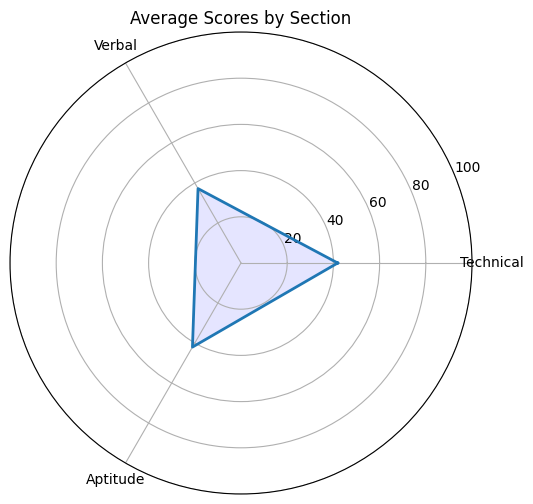

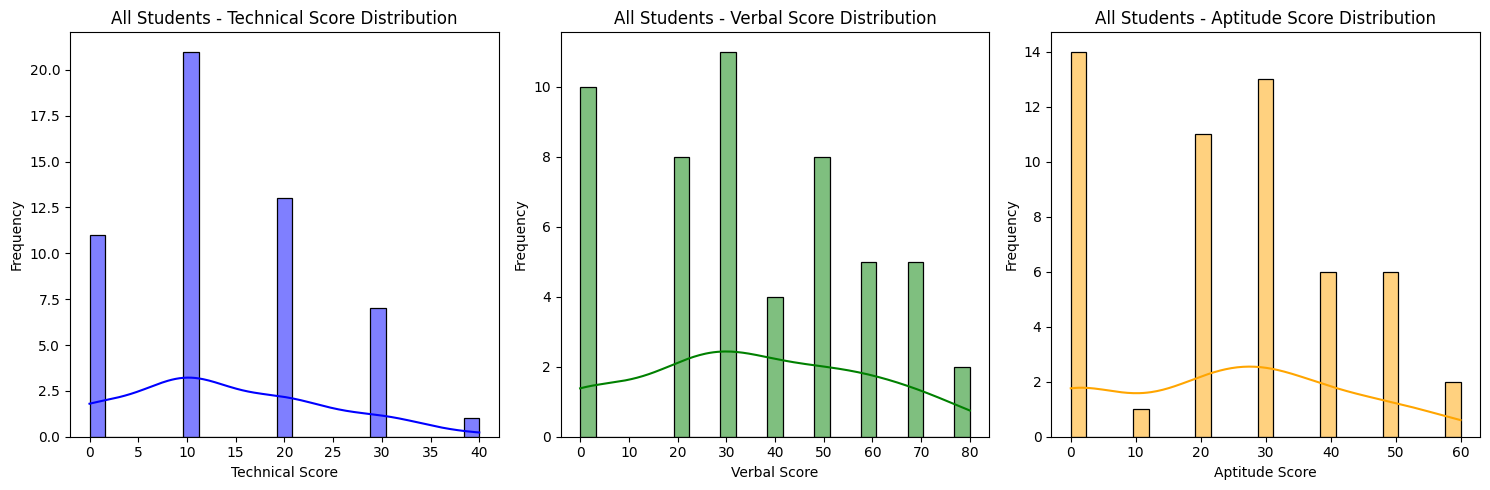

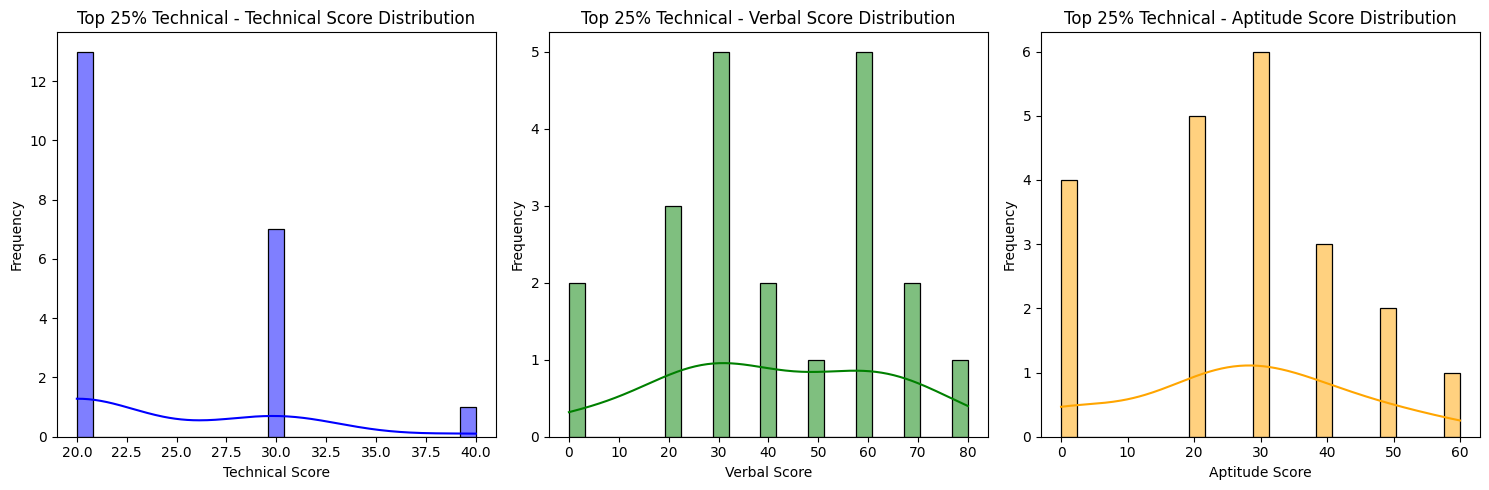

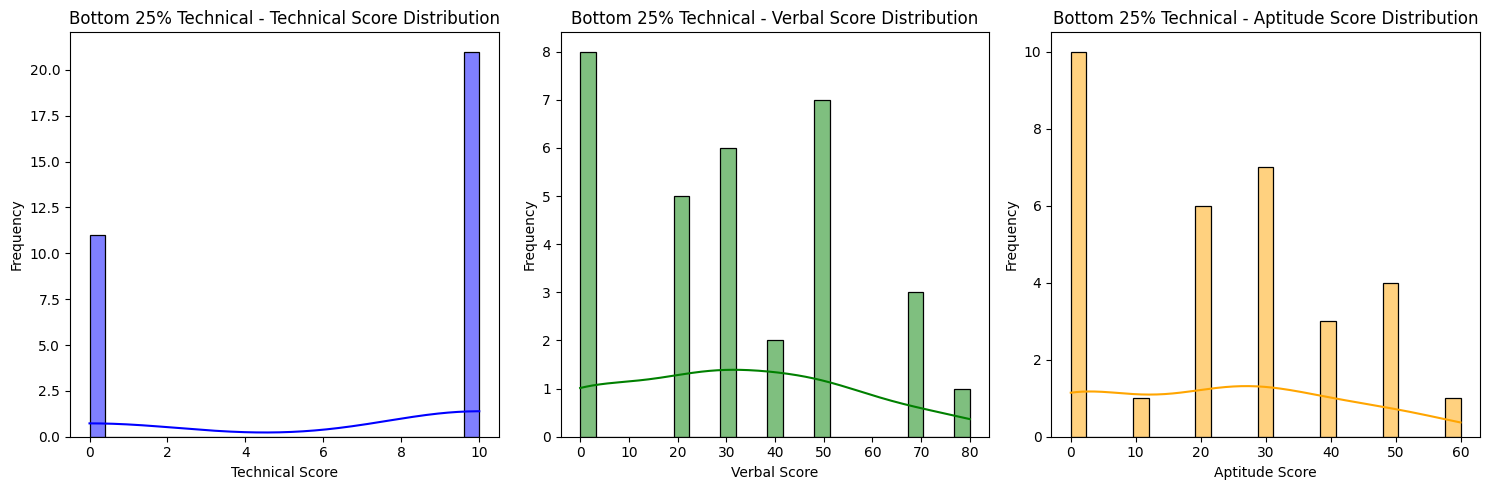

<ipython-input-42-cf3edc06f658>:298: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
<ipython-input-42-cf3edc06f658>:301: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", style='B', size=16)
<ipython-input-42-cf3edc06f658>:302: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
<ipython-input-42-cf3edc06f658>:302: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
<ipython-input-42-cf3edc06f658>:306: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated

'/content/job_readiness_test_mobile_report_.pdf'

<Figure size 1800x600 with 0 Axes>

In [42]:
#Code Cell for Mobile JRT test

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import tempfile
import os

# Load the data
data = pd.read_excel('/content/rgit-mobile-2024-11-21-problemwise.xlsx')
college_name = "RGIT College"


# Print columns to identify mismatches
# print(data.columns)

# Update the columns with the correct ones from the Excel file
aptitude_columns = [
    "Aptitude Problem 01(Multiple-choice) - Candidate Score",
    "Aptitude Problem 02(Multiple-choice) - Candidate Score",
    "Aptitude Problem 03(Multiple-choice) - Candidate Score",
    "Aptitude Problem 04(Multiple-choice) - Candidate Score",
    "Aptitude Problem 05(Multiple-choice) - Candidate Score",
    "Aptitude Problem 06(Multiple-choice) - Candidate Score",
    "Aptitude Problem 07(Multiple-choice) - Candidate Score",
    "Aptitude Problem 08(Multiple-choice) - Candidate Score",
    "Aptitude Problem 09(Multiple-choice) - Candidate Score",
    "Aptitude Problem 15(Multiple-choice) - Candidate Score"
]
aptitude_max = [
    "Aptitude Problem 01(Multiple-choice) - Max Score",
    "Aptitude Problem 02(Multiple-choice) - Max Score",
    "Aptitude Problem 03(Multiple-choice) - Max Score",
    "Aptitude Problem 04(Multiple-choice) - Max Score",
    "Aptitude Problem 05(Multiple-choice) - Max Score",
    "Aptitude Problem 06(Multiple-choice) - Max Score",
    "Aptitude Problem 07(Multiple-choice) - Max Score",
    "Aptitude Problem 08(Multiple-choice) - Max Score",
    "Aptitude Problem 09(Multiple-choice) - Max Score",
    "Aptitude Problem 15(Multiple-choice) - Max Score"
]

technical_columns = [
    "Pseudocode logic(Multiple-choice) - Candidate Score",
    "Search Algorithms(Multiple-choice) - Candidate Score",
    "Networking(Multiple-choice) - Candidate Score",
    "logical reasoning(Multiple-choice) - Candidate Score",
    "code control flow(Multiple-choice) - Candidate Score",
    "Boolean logic(Multiple-choice) - Candidate Score"
]
technical_max = [
    "Pseudocode logic(Multiple-choice) - Max Score",
    "Search Algorithms(Multiple-choice) - Max Score",
    "Networking(Multiple-choice) - Max Score",
    "logical reasoning(Multiple-choice) - Max Score",
    "code control flow(Multiple-choice) - Max Score",
    "Boolean logic(Multiple-choice) - Max Score"
]

verbal_columns = [
    "Verbal Aptitude: Decision(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Telephone(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Damage(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Playgrounds(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Developers(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Theif(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Study Found(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Foreign(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Liberate(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Recurit Personnal(Multiple-choice) - Candidate Score",
    "Verbal Aptitude: Caste Conflict(Multiple-choice) - Candidate Score",
    "Verbal Ability: Warm(Multiple-choice) - Candidate Score",
    "Verbal Ability: Audience Urging(Multiple-choice) - Candidate Score",
    "Verbal Ability: Entrusted(Multiple-choice) - Candidate Score",
    "Verbal Ability 16(Multiple-choice) - Candidate Score",
    "Verbal Ability 17(Multiple-choice) - Candidate Score",
    "Verbal Ability 18(Multiple-choice) - Candidate Score",
    "Verbal Ability 25(Multiple-choice) - Candidate Score"
]
verbal_max = [
    "Verbal Aptitude: Decision(Multiple-choice) - Max Score",
    "Verbal Aptitude: Telephone(Multiple-choice) - Max Score",
    "Verbal Aptitude: Damage(Multiple-choice) - Max Score",
    "Verbal Aptitude: Playgrounds(Multiple-choice) - Max Score",
    "Verbal Aptitude: Developers(Multiple-choice) - Max Score",
    "Verbal Aptitude: Theif(Multiple-choice) - Max Score",
    "Verbal Aptitude: Study Found(Multiple-choice) - Max Score",
    "Verbal Aptitude: Foreign(Multiple-choice) - Max Score",
    "Verbal Aptitude: Liberate(Multiple-choice) - Max Score",
    "Verbal Aptitude: Recurit Personnal(Multiple-choice) - Max Score",
    "Verbal Aptitude: Caste Conflict(Multiple-choice) - Max Score",
    "Verbal Ability: Warm(Multiple-choice) - Max Score",
    "Verbal Ability: Audience Urging(Multiple-choice) - Max Score",
    "Verbal Ability: Entrusted(Multiple-choice) - Max Score",
    "Verbal Ability 16(Multiple-choice) - Max Score",
    "Verbal Ability 17(Multiple-choice) - Max Score",
    "Verbal Ability 18(Multiple-choice) - Max Score",
    "Verbal Ability 25(Multiple-choice) - Max Score"
]

# Calculate total scores and maximum scores for each skill category
data['Aptitude Score'] = data[aptitude_columns].sum(axis=1)
data['Aptitude Max'] = data[aptitude_max].sum(axis=1)

data['Technical Score'] = data[technical_columns].sum(axis=1)
data['Technical Max'] = data[technical_max].sum(axis=1)

data['Verbal Score'] = data[verbal_columns].sum(axis=1)
data['Verbal Max'] = data[verbal_max].sum(axis=1)

# Calculate overall total score and max score
data['Total Score'] = data[['Aptitude Score', 'Technical Score', 'Verbal Score']].sum(axis=1)
data['Total Max'] = data[['Aptitude Max', 'Technical Max', 'Verbal Max']].sum(axis=1)
data['Total Score Percentage'] = (data['Total Score'] / data['Total Max']) * 100

# Calculate percentage scores for each skill category
data['Aptitude %'] = (data['Aptitude Score'] / data['Aptitude Max']) * 100
data['Technical %'] = (data['Technical Score'] / data['Technical Max']) * 100
data['Verbal %'] = (data['Verbal Score'] / data['Verbal Max']) * 100

# Visualization setup
plot_paths = []

# Function to save plots temporarily and add path to list
def save_plot_temp(fig, name):
    tmp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".png")
    fig.savefig(tmp_file.name, format="png", bbox_inches="tight")
    plot_paths.append(tmp_file.name)
    plt.close(fig)



# 1. Total Score Percentage Distribution
fig1 = plt.figure(figsize=(12, 6))
sns.histplot(data['Total Score Percentage'], kde=True, color='skyblue')
plt.title('Total Score Percentage Distribution')
plt.xlabel('Total Score Percentage')
plt.ylabel('Number of Candidates')
save_plot_temp(fig1, 'Total Score Percentage Distribution')

# 2. Average Percentage Scores by Skill Category
fig2 = plt.figure(figsize=(8, 6))
avg_category_scores = data[['Aptitude %', 'Technical %', 'Verbal %']].mean()
avg_category_scores.plot(kind='bar', color=['lightcoral', 'mediumseagreen', 'royalblue'])
plt.title('Average Percentage Scores by Skill Category')
plt.ylabel('Average Score (%)')
plt.xlabel('Skill Category')
save_plot_temp(fig2, 'Average Percentage Scores by Skill Category')



# 3. Score Distribution by Skill Category (Box plot)
fig3 = plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Aptitude %', 'Technical %', 'Verbal %']])
plt.title('Score Distribution by Skill Category (as % of Max)')
plt.ylabel('Score Percentage')
plt.xlabel('Skill Category')
save_plot_temp(fig3, 'Score Distribution by Skill Category')

# 4. Individual Learner Scores by Skill Category (Heatmap)
fig4 = plt.figure(figsize=(14, 8))
sns.heatmap(data[['Aptitude %', 'Technical %', 'Verbal %']], cmap="YlGnBu", annot=False)
plt.title('Individual Learner Scores by Skill Category (%)')
plt.ylabel('Learner')
plt.xlabel('Skill Category')
save_plot_temp(fig4, 'Individual Learner Scores by Skill Category')

import numpy as np
from math import pi

categories = ['Technical', 'Verbal', 'Aptitude']
avg_scores = [
    data['Technical %'].mean(),
    data['Verbal %'].mean(),
    data['Aptitude %'].mean()
]

# 5. Radar chart setup
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

avg_scores += avg_scores[:1]

fig5 = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)

ax.set_ylim(0, 100)

# Plot data
ax.plot(angles, avg_scores, linewidth=2, linestyle='solid')
ax.fill(angles, avg_scores, 'b', alpha=0.1)
plt.title('Average Scores by Section')
plt.show()
save_plot_temp(fig5, 'Radar Chart Setup')

#6 Ensure numeric columns are properly converted ---
data['Technical Score'] = pd.to_numeric(data['Technical Score'], errors='coerce').fillna(0)
data['Verbal Score'] = pd.to_numeric(data['Verbal Score'], errors='coerce').fillna(0)
data['Aptitude Score'] = pd.to_numeric(data['Aptitude Score'], errors='coerce').fillna(0)

# Define top and bottom 25% thresholds for Technical scores
top_25_threshold = data['Technical Score'].quantile(0.75)
bottom_25_threshold = data['Technical Score'].quantile(0.25)

# Filter for top 25% and bottom 25% based on Technical scores
top_25_technical = data[data['Technical Score'] >= top_25_threshold]
bottom_25_technical = data[data['Technical Score'] <= bottom_25_threshold]



# Function to plot distributions for a given subset of data
def plot_distributions(df, subset_name):
    fig0 = plt.figure(figsize=(15, 5))

    # Technical Score Distribution
    plt.subplot(1, 3, 1)
    sns.histplot(df['Technical Score'], bins=25, color='blue', kde=True)
    plt.title(f'{subset_name} - Technical Score Distribution')
    plt.xlabel('Technical Score')
    plt.ylabel('Frequency')

    # Verbal Score Distribution
    plt.subplot(1, 3, 2)
    sns.histplot(df['Verbal Score'], bins=25, color='green', kde=True)
    plt.title(f'{subset_name} - Verbal Score Distribution')
    plt.xlabel('Verbal Score')
    plt.ylabel('Frequency')

    # Aptitude Score Distribution
    plt.subplot(1, 3, 3)
    sns.histplot(df['Aptitude Score'], bins=25, color='orange', kde=True)
    plt.title(f'{subset_name} - Aptitude Score Distribution')
    plt.xlabel('Aptitude Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    save_plot_temp(fig0, f'{subset_name} Score Percentage Distribution')

# Plot distributions for All Students, Top 25%, and Bottom 25%
plot_distributions(data, "All Students")
plot_distributions(top_25_technical, "Top 25% Technical")
plot_distributions(bottom_25_technical, "Bottom 25% Technical")

# Separate Score Distribution for Technical, Verbal, and Aptitude (All Students, Top 25%, and Bottom 25%)
plt.figure(figsize=(18, 6))
#---

# Adding Insights to the PDF report

# Function to add sections with specific styles
def add_section(pdf, title, content, title_style='B', content_style=''):
    pdf.set_font("Arial", style=title_style, size=14)
    pdf.cell(200, 10, txt=title, ln=True, align='L')
    pdf.ln(5)  # Line break
    pdf.set_font("Arial", style=content_style, size=12)
    pdf.multi_cell(0, 10, txt=content)
    pdf.ln(10)  # Line break

# Function to add images to the PDF dynamically
def add_image(pdf, image_path, title, description, width=180):
    add_section(pdf, title, description, title_style='B', content_style='I')
    pdf.image(image_path, w=width)
    pdf.ln(10)

# Titles and Descriptions for Graphs
graph_details = [
    ("1. Total Score Percentage Distribution",
     "This plot shows the distribution of total score percentages among learners.",
     plot_paths[0]),
    ("2. Average Percentage Scores by Skill Category",
     "This bar graph illustrates the average scores in Aptitude, Technical, and Verbal categories.",
     plot_paths[1]),
    ("3. Score Distribution by Skill Category (Box Plot)",
     "This box plot highlights the variability of scores within each skill category.",
     plot_paths[2]),
    ("4. Individual Learner Scores by Skill Category (Heatmap)",
     "This heatmap provides a detailed look at individual scores across skill categories.",
     plot_paths[3]),
   ("5. Radar Chart",
     "This plot shows the distribution of Average scores across Technical, Verbal, and Aptitude categories on Radar chart.",
     plot_paths[4]),
    ("6. All students, Top 25%, Bottom 25% students Score Distribution",
     "This plot shows the distribution of scores across Technical, Verbal, and Aptitude categories for All, top 25%, bottom 25% Students .",
     plot_paths[5]),
    ("","Top 25% ",plot_paths[6]),
    ("","Bottom 25% ",plot_paths[7]),
]


# Generate PDF Report
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set the font for the introduction text
pdf.set_font("Arial", size=12)

# Title of the report (Centered, Bold)
pdf.set_font("Arial", style='B', size=16)
pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
pdf.ln(10)

# Add the college name (Centered, Bold)
pdf.set_font("Arial", style='B', size=14)
pdf.cell(200, 10, txt=f"{college_name}", ln=True, align='C')
pdf.ln(10)

# Introduction Text (Italic)
intro_text = """
This report categorizes candidate performance across three key skill areas:
Aptitude, Technical, Verbal. By analyzing each skill area
individually, the report highlights candidates' strengths and identifies areas for
potential improvement. This breakdown aims to provide a clear understanding
of where candidates excel and where they may benefit from focused support.
Through this analysis, we seek to guide targeted educational interventions that
enhance overall learning outcomes and career readiness.
"""
add_section(pdf, "Introduction", intro_text, content_style='I')

# Add Graphs Dynamically
for title, description, img_path in graph_details:
    pdf.add_page()
    add_image(pdf, img_path, title, description)

# Add Total Score Percentage Summary
pdf.set_font("Arial", style='B', size=14)
pdf.cell(200, 10, txt="5. Total Score Percentage Summary", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=f"Average Total Score Percentage: {data['Total Score Percentage'].mean():.2f}%")
pdf.ln(10)

# Add Average Percentage Scores by Skill Category
add_section(pdf, "6. Average Percentage Scores by Skill Category",
            "\n".join([f"{category}: {score:.2f}%" for category, score in avg_category_scores.items()]), title_style='B')

# # Add Score Distribution by Skill Category
# add_section(pdf, "3. Score Distribution by Skill Category", "This plot shows the score distribution across all categories.", title_style='B')
# add_image(pdf, plot_paths[1])

# # Add Individual Learner Scores by Skill Category
# add_section(pdf, "4. Individual Learner Scores by Skill Category", "This heatmap displays individual learner scores by skill category.", title_style='B')
# add_image(pdf, plot_paths[3])

# Add Insights and Observations
# Dynamically generate insights from the dataset

# Performance distribution ranges
above_60 = len(data[data['Total Score Percentage'] > 60])
between_41_60 = len(data[(data['Total Score Percentage'] > 40) & (data['Total Score Percentage'] <= 60)])
between_21_40 = len(data[(data['Total Score Percentage'] > 20) & (data['Total Score Percentage'] <= 40)])
below_20 = len(data[data['Total Score Percentage'] <= 20])
total_learners = len(data)

# Skill category average scores
avg_aptitude = data['Aptitude %'].mean()
avg_technical = data['Technical %'].mean()
avg_verbal = data['Verbal %'].mean()

# Score range groups
above_80 = len(data[data['Total Score Percentage'] > 80])
between_61_80 = len(data[(data['Total Score Percentage'] > 60) & (data['Total Score Percentage'] <= 80)])
below_60 = len(data[data['Total Score Percentage'] <= 60])

# Insights text dynamically generated
insights_text = f"""
1. Overall Performance Distribution:
- Above 60%: {above_60} learners ({(above_60 / total_learners) * 100:.2f}%)
- 41-60%: {between_41_60} learners ({(between_41_60 / total_learners) * 100:.2f}%)
- 21-40%: {between_21_40} learners ({(between_21_40 / total_learners) * 100:.2f}%)
- Below 20%: {below_20} learners ({(below_20 / total_learners) * 100:.2f}%)

2. Score Range Insights:
- Above 80%: {above_80} learners ({(above_80 / total_learners) * 100:.2f}%)
- 61-80%: {between_61_80} learners ({(between_61_80 / total_learners) * 100:.2f}%)
- Below 60%: {below_60} learners ({(below_60 / total_learners) * 100:.2f}%)

3. Individual Performance Insights:
- Learners with strong performance across all skill categories are clustered in the top quartile.
- Verbal and Soft Skills show the widest variability, highlighting areas for potential focused improvement.

4. Distribution by Skill Category:
- Technical Skills have the highest consistency with fewer outliers.
- Verbal Skills exhibit a broader range, suggesting mixed competency levels.

5. Proctoring and Violations:
- Proctoring Verdicts: A mix of "Negligible," "Minor," and "Severe" proctoring verdicts were recorded. Candidates with severe violations typically had multiple infractions.
- Violations: Some candidates had minimal to zero violations, while others had violations ranging up to about 10 minutes.

6. Final Verdict:
- Qualified Candidates: The majority of candidates were marked as "Qualified," with a wide range in scores and violations.
- Improvement Areas: Key improvement areas include code quality, technical sections like Boolean logic, and data communication skills.
"""
add_section(pdf, "7. Insights and Observations", insights_text, title_style='B', content_style='I')

# Add Suggestions and Final Remarks
suggestions_text = """
Suggestions:
- Focused Training: Consider providing additional training in code quality, Boolean logic, and data insights communication.
- Enhanced Proctoring: Address the severity of test window violations, as candidates with "Severe" proctoring issues may need closer monitoring.
- Targeted Feedback: Give personalized feedback to low-performing candidates, especially in sections where they scored zero.

Additional Information:
We have the option to share individual score reports for each candidate. A download link to the report is available in the Excel file shared with this report.
"""
add_section(pdf, "8. Suggestions and Final Remarks", suggestions_text, title_style='B', content_style='I')

# Save the PDF report
report_path = '/content/job_readiness_test_mobile_report_.pdf'
pdf.output(report_path)

# Clean up plot files
for path in plot_paths:
    os.remove(path)

report_path

In [44]:
#Code Cell for MBA JRT Test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import tempfile
import os

# Load the dataset (assuming you already have it as a CSV or DataFrame)
data = pd.read_excel('/content/report-upgrad-job-readiness-test-mba-2024-11-25-problemwise.xlsx')
college_name = " "


# List of columns for Aptitude and Verbal questions (with corrected column names)
# Aptitude Columns
# Aptitude Columns (for Candidate Scores)
aptitude_columns = [
    "Aptitude Problem 01(Multiple-choice) - Candidate Score",
    "Aptitude Problem 02(Multiple-choice) - Candidate Score",
    "Aptitude Problem 03(Multiple-choice) - Candidate Score",
    "Aptitude Problem 04(Multiple-choice) - Candidate Score",
    "Aptitude Problem 05(Multiple-choice) - Candidate Score",
    "Aptitude Problem 06(Multiple-choice) - Candidate Score",
    "Aptitude Problem 07(Multiple-choice) - Candidate Score",
    "Aptitude Problem 08(Multiple-choice) - Candidate Score",
    "Aptitude Problem 09(Multiple-choice) - Candidate Score",
    "Aptitude Problem 10(Multiple-choice) - Candidate Score",
    "Aptitude Problem 11(Multiple-choice) - Candidate Score",
    "Aptitude Problem 12(Multiple-choice) - Candidate Score",
    "Aptitude Problem 13(Multiple-choice) - Candidate Score",
    "Aptitude Problem 14(Multiple-choice) - Candidate Score",
    "Aptitude Problem 15(Multiple-choice) - Candidate Score"
]

# Verbal Columns (for Candidate Scores)
verbal_columns = [
    "Verbal Ability 01(Multiple-choice) - Candidate Score",
    "Verbal Ability 02(Multiple-choice) - Candidate Score",
    "Verbal Ability 03(Multiple-choice) - Candidate Score",
    "Verbal Ability 04(Multiple-choice) - Candidate Score",
    "Verbal Ability 06(Multiple-choice) - Candidate Score",
    "Verbal Ability 07(Multiple-choice) - Candidate Score",
    "Verbal Ability 08(Multiple-choice) - Candidate Score",
    "Verbal Ability 09(Multiple-choice) - Candidate Score",
    "Verbal Ability 11(Multiple-choice) - Candidate Score",
    "Verbal Ability 12(Multiple-choice) - Candidate Score",
    "Verbal Ability 13(Multiple-choice) - Candidate Score",
    "Verbal Ability 14(Multiple-choice) - Candidate Score",
    "Verbal Ability 15(Multiple-choice) - Candidate Score",
    "Verbal Ability 16(Multiple-choice) - Candidate Score",
    "Verbal Ability 17(Multiple-choice) - Candidate Score",
    "Verbal Ability 18(Multiple-choice) - Candidate Score",
    "Verbal Ability 25(Multiple-choice) - Candidate Score"
]

# MBA MCQ Columns (for Candidate Scores)
mba_mcq_columns = [
    "Question 1(Multiple-choice) - Candidate Score",
    "Question 2(Multiple-choice) - Candidate Score",
    "Question 3(Multiple-choice) - Candidate Score",
    "Question 4(Multiple-choice) - Candidate Score",
    "Question 5(Multiple-choice) - Candidate Score",
    "Question 6(Multiple-choice) - Candidate Score",
    "Question 7(Multiple-choice) - Candidate Score",
    "Question 8(Multiple-choice) - Candidate Score",
    "Question 9(Multiple-choice) - Candidate Score",
    "Question 10(Multiple-choice) - Candidate Score",
    "Question  11(Multiple-choice) - Candidate Score",
    "Question 12(Multiple-choice) - Candidate Score",
    "Question 13(Multiple-choice) - Candidate Score",
    "Question 14(Multiple-choice) - Candidate Score",
    "Question 15(Multiple-choice) - Candidate Score",
    "Question 16(Multiple-choice) - Candidate Score",
    "Question 17(Multiple-choice) - Candidate Score",
    "Question 18(Multiple-choice) - Candidate Score",
    "Question 19(Multiple-choice) - Candidate Score",
    "Question 20(Multiple-choice) - Candidate Score"
]

# Max Aptitude Scores
aptitude_max_columns = [
    "Aptitude Problem 01(Multiple-choice) - Max Score",
    "Aptitude Problem 02(Multiple-choice) - Max Score",
    "Aptitude Problem 03(Multiple-choice) - Max Score",
    "Aptitude Problem 04(Multiple-choice) - Max Score",
    "Aptitude Problem 05(Multiple-choice) - Max Score",
    "Aptitude Problem 06(Multiple-choice) - Max Score",
    "Aptitude Problem 07(Multiple-choice) - Max Score",
    "Aptitude Problem 08(Multiple-choice) - Max Score",
    "Aptitude Problem 09(Multiple-choice) - Max Score",
    "Aptitude Problem 10(Multiple-choice) - Max Score",
    "Aptitude Problem 11(Multiple-choice) - Max Score",
    "Aptitude Problem 12(Multiple-choice) - Max Score",
    "Aptitude Problem 13(Multiple-choice) - Max Score",
    "Aptitude Problem 14(Multiple-choice) - Max Score",
    "Aptitude Problem 15(Multiple-choice) - Max Score"
]

# Max Verbal Scores
verbal_max_columns = [
    "Verbal Ability 01(Multiple-choice) - Max Score",
    "Verbal Ability 02(Multiple-choice) - Max Score",
    "Verbal Ability 03(Multiple-choice) - Max Score",
    "Verbal Ability 04(Multiple-choice) - Max Score",
    "Verbal Ability 06(Multiple-choice) - Max Score",
    "Verbal Ability 07(Multiple-choice) - Max Score",
    "Verbal Ability 08(Multiple-choice) - Max Score",
    "Verbal Ability 09(Multiple-choice) - Max Score",
    "Verbal Ability 11(Multiple-choice) - Max Score",
    "Verbal Ability 12(Multiple-choice) - Max Score",
    "Verbal Ability 13(Multiple-choice) - Max Score",
    "Verbal Ability 14(Multiple-choice) - Max Score",
    "Verbal Ability 15(Multiple-choice) - Max Score",
    "Verbal Ability 16(Multiple-choice) - Max Score",
    "Verbal Ability 17(Multiple-choice) - Max Score",
    "Verbal Ability 18(Multiple-choice) - Max Score",
    "Verbal Ability 25(Multiple-choice) - Max Score"
]

# Max MBA MCQ Scores
mba_mcq_max_columns = [
    "Question 1(Multiple-choice) - Max Score",
    "Question 2(Multiple-choice) - Max Score",
    "Question 3(Multiple-choice) - Max Score",
    "Question 4(Multiple-choice) - Max Score",
    "Question 5(Multiple-choice) - Max Score",
    "Question 6(Multiple-choice) - Max Score",
    "Question 7(Multiple-choice) - Max Score",
    "Question 8(Multiple-choice) - Max Score",
    "Question 9(Multiple-choice) - Max Score",
    "Question 10(Multiple-choice) - Max Score",
    "Question  11(Multiple-choice) - Max Score",
    "Question 12(Multiple-choice) - Max Score",
    "Question 13(Multiple-choice) - Max Score",
    "Question 14(Multiple-choice) - Max Score",
    "Question 15(Multiple-choice) - Max Score",
    "Question 16(Multiple-choice) - Max Score",
    "Question 17(Multiple-choice) - Max Score",
    "Question 18(Multiple-choice) - Max Score",
    "Question 19(Multiple-choice) - Max Score",
    "Question 20(Multiple-choice) - Max Score"
]



# Calculate total scores and maximum scores for each skill category
data['Aptitude Score'] = data[aptitude_columns].sum(axis=1)
data['Aptitude Max'] = data[aptitude_max_columns].sum(axis=1)

data['MBA Score'] = data[mba_mcq_columns].sum(axis=1)
data['MBA Max'] = data[mba_mcq_max_columns].sum(axis=1)

data['Verbal Score'] = data[verbal_columns].sum(axis=1)
data['Verbal Max'] = data[verbal_max_columns].sum(axis=1)

# Calculate overall total score and max score
data['Total Score'] = data[['Aptitude Score', 'MBA Score', 'Verbal Score']].sum(axis=1)
data['Total Max'] = data[['Aptitude Max', 'MBA Max', 'Verbal Max']].sum(axis=1)
data['Total Score Percentage'] = (data['Total Score'] / data['Total Max']) * 100

# Calculate percentage scores for each skill category
data['Aptitude %'] = (data['Aptitude Score'] / data['Aptitude Max']) * 100
data['MBA %'] = (data['MBA Score'] / data['MBA Max']) * 100
data['Verbal %'] = (data['Verbal Score'] / data['Verbal Max']) * 100

# Visualization setup
plot_paths = []

# Function to save plots temporarily and add path to list
def save_plot_temp(fig, name):
    tmp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".png")
    fig.savefig(tmp_file.name, format="png", bbox_inches="tight")
    plot_paths.append(tmp_file.name)
    plt.close(fig)

# 1. Total Score Percentage Distribution
fig1 = plt.figure(figsize=(12, 6))
sns.histplot(data['Total Score Percentage'], kde=True, color='skyblue')
plt.title('Total Score Percentage Distribution')
plt.xlabel('Total Score Percentage')
plt.ylabel('Number of Candidates')
save_plot_temp(fig1, 'Total Score Percentage Distribution')

# 2. Average Percentage Scores by Skill Category
fig2 = plt.figure(figsize=(8, 6))
avg_category_scores = data[['Aptitude %', 'MBA %', 'Verbal %']].mean()
avg_category_scores.plot(kind='bar', color=['lightcoral', 'mediumseagreen', 'royalblue'])
plt.title('Average Percentage Scores by Skill Category')
plt.ylabel('Average Score (%)')
plt.xlabel('Skill Category')
save_plot_temp(fig2, 'Average Percentage Scores by Skill Category')



# 3. Score Distribution by Skill Category (Box plot)
fig3 = plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Aptitude %', 'MBA %', 'Verbal %']])
plt.title('Score Distribution by Skill Category (as % of Max)')
plt.ylabel('Score Percentage')
plt.xlabel('Skill Category')
save_plot_temp(fig3, 'Score Distribution by Skill Category')

# 4. Individual Learner Scores by Skill Category (Heatmap)
fig4 = plt.figure(figsize=(14, 8))
sns.heatmap(data[['Aptitude %', 'MBA %', 'Verbal %']], cmap="YlGnBu", annot=False)
plt.title('Individual Learner Scores by Skill Category (%)')
plt.ylabel('Learner')
plt.xlabel('Skill Category')
save_plot_temp(fig4, 'Individual Learner Scores by Skill Category')

import numpy as np
from math import pi

categories = ['MBA', 'Verbal', 'Aptitude']
avg_scores = [
    data['MBA %'].mean(),
    data['Verbal %'].mean(),
    data['Aptitude %'].mean()
]

# 5. Radar chart setup
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

avg_scores += avg_scores[:1]

fig5 = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)

ax.set_ylim(0, 100)

# Plot data
ax.plot(angles, avg_scores, linewidth=2, linestyle='solid')
ax.fill(angles, avg_scores, 'b', alpha=0.1)
plt.title('Average Scores by Section')
# plt.show()
save_plot_temp(fig5, 'Radar Chart Setup')

#6 Ensure numeric columns are properly converted ---
data['MBA Score'] = pd.to_numeric(data['MBA Score'], errors='coerce').fillna(0)
data['Verbal Score'] = pd.to_numeric(data['Verbal Score'], errors='coerce').fillna(0)
data['Aptitude Score'] = pd.to_numeric(data['Aptitude Score'], errors='coerce').fillna(0)

# Define top and bottom 25% thresholds for Technical scores
top_25_threshold = data['MBA Score'].quantile(0.75)
bottom_25_threshold = data['MBA Score'].quantile(0.25)

# Filter for top 25% and bottom 25% based on Technical scores
top_25_technical = data[data['MBA Score'] >= top_25_threshold]
bottom_25_technical = data[data['MBA Score'] <= bottom_25_threshold]



# Function to plot distributions for a given subset of data
def plot_distributions(df, subset_name):
    fig0 = plt.figure(figsize=(15, 5))

    # Technical Score Distribution
    plt.subplot(1, 3, 1)
    sns.histplot(df['MBA Score'], bins=25, color='blue', kde=True)
    plt.title(f'{subset_name} - Technical Score Distribution')
    plt.xlabel('MBA Score')
    plt.ylabel('Frequency')

    # Verbal Score Distribution
    plt.subplot(1, 3, 2)
    sns.histplot(df['Verbal Score'], bins=25, color='green', kde=True)
    plt.title(f'{subset_name} - Verbal Score Distribution')
    plt.xlabel('Verbal Score')
    plt.ylabel('Frequency')

    # Aptitude Score Distribution
    plt.subplot(1, 3, 3)
    sns.histplot(df['Aptitude Score'], bins=25, color='orange', kde=True)
    plt.title(f'{subset_name} - Aptitude Score Distribution')
    plt.xlabel('Aptitude Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    # plt.show()
    save_plot_temp(fig0, f'{subset_name} Score Percentage Distribution')

# Plot distributions for All Students, Top 25%, and Bottom 25%
plot_distributions(data, "All Students")
plot_distributions(top_25_technical, "Top 25% MBA")
plot_distributions(bottom_25_technical, "Bottom 25% MBA")

# Separate Score Distribution for Technical, Verbal, and Aptitude (All Students, Top 25%, and Bottom 25%)
plt.figure(figsize=(18, 6))
#---

# Adding Insights to the PDF report

# Function to add sections with specific styles
def add_section(pdf, title, content, title_style='B', content_style=''):
    pdf.set_font("Arial", style=title_style, size=14)
    pdf.cell(200, 10, txt=title, ln=True, align='L')
    pdf.ln(5)  # Line break
    pdf.set_font("Arial", style=content_style, size=12)
    pdf.multi_cell(0, 10, txt=content)
    pdf.ln(10)  # Line break

# Function to add images to the PDF dynamically
def add_image(pdf, image_path, title, description, width=180):
    add_section(pdf, title, description, title_style='B', content_style='I')
    pdf.image(image_path, w=width)
    pdf.ln(10)

# Titles and Descriptions for Graphs
graph_details = [
    ("1. Total Score Percentage Distribution",
     "This plot shows the distribution of total score percentages among learners.",
     plot_paths[0]),
    ("2. Average Percentage Scores by Skill Category",
     "This bar graph illustrates the average scores in Aptitude, MBA, and Verbal categories.",
     plot_paths[1]),
    ("3. Score Distribution by Skill Category (Box Plot)",
     "This box plot highlights the variability of scores within each skill category.",
     plot_paths[2]),
    ("4. Individual Learner Scores by Skill Category (Heatmap)",
     "This heatmap provides a detailed look at individual scores across skill categories.",
     plot_paths[3]),
    ("5. Radar Chart",
     "This plot shows the distribution of Average scores across Technical, Verbal, and Aptitude categories on Radar chart.",
     plot_paths[4]),
    ("6. All students, Top 25%, Bottom 25% students Score Distribution",
     "This plot shows the distribution of scores across Technical, Verbal, and Aptitude categories for All, top 25%, bottom 25% Students .",
     plot_paths[5]),
    ("","Top 25% ",plot_paths[6]),
    ("","Bottom 25% ",plot_paths[7]),
]


# Generate PDF Report
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set the font for the introduction text
pdf.set_font("Arial", size=12)

# Title of the report (Centered, Bold)
pdf.set_font("Arial", style='B', size=16)
pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
pdf.ln(10)

# Add the college name (Centered, Bold)
pdf.set_font("Arial", style='B', size=14)
pdf.cell(200, 10, txt=f"{college_name}", ln=True, align='C')
pdf.ln(10)

# Introduction Text (Italic)
intro_text = """
This report categorizes candidate performance across three key skill areas:
Aptitude, MBA, Verbal. By analyzing each skill area
individually, the report highlights candidates' strengths and identifies areas for
potential improvement. This breakdown aims to provide a clear understanding
of where candidates excel and where they may benefit from focused support.
Through this analysis, we seek to guide targeted educational interventions that
enhance overall learning outcomes and career readiness.
"""
add_section(pdf, "Introduction", intro_text, content_style='I')

# Add Graphs Dynamically
for title, description, img_path in graph_details:
    pdf.add_page()
    add_image(pdf, img_path, title, description)

# Add Total Score Percentage Summary
pdf.set_font("Arial", style='B', size=14)
pdf.cell(200, 10, txt="5. Total Score Percentage Summary", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=f"Average Total Score Percentage: {data['Total Score Percentage'].mean():.2f}%")
pdf.ln(10)

# Add Average Percentage Scores by Skill Category
add_section(pdf, "6. Average Percentage Scores by Skill Category",
            "\n".join([f"{category}: {score:.2f}%" for category, score in avg_category_scores.items()]), title_style='B')

# # Add Score Distribution by Skill Category
# add_section(pdf, "3. Score Distribution by Skill Category", "This plot shows the score distribution across all categories.", title_style='B')
# add_image(pdf, plot_paths[1])

# # Add Individual Learner Scores by Skill Category
# add_section(pdf, "4. Individual Learner Scores by Skill Category", "This heatmap displays individual learner scores by skill category.", title_style='B')
# add_image(pdf, plot_paths[3])

# Add Insights and Observations
# Dynamically generate insights from the dataset

# Performance distribution ranges
above_60 = len(data[data['Total Score Percentage'] > 60])
between_41_60 = len(data[(data['Total Score Percentage'] > 40) & (data['Total Score Percentage'] <= 60)])
between_21_40 = len(data[(data['Total Score Percentage'] > 20) & (data['Total Score Percentage'] <= 40)])
below_20 = len(data[data['Total Score Percentage'] <= 20])
total_learners = len(data)

# Skill category average scores
avg_aptitude = data['Aptitude %'].mean()
avg_mba = data['MBA %'].mean()
avg_verbal = data['Verbal %'].mean()

# Score range groups
above_80 = len(data[data['Total Score Percentage'] > 80])
between_61_80 = len(data[(data['Total Score Percentage'] > 60) & (data['Total Score Percentage'] <= 80)])
below_60 = len(data[data['Total Score Percentage'] <= 60])

# Insights text dynamically generated
insights_text = f"""
1. Overall Performance Distribution:
- Above 60%: {above_60} learners ({(above_60 / total_learners) * 100:.2f}%)
- 41-60%: {between_41_60} learners ({(between_41_60 / total_learners) * 100:.2f}%)
- 21-40%: {between_21_40} learners ({(between_21_40 / total_learners) * 100:.2f}%)
- Below 20%: {below_20} learners ({(below_20 / total_learners) * 100:.2f}%)

2. Score Range Insights:
- Above 80%: {above_80} learners ({(above_80 / total_learners) * 100:.2f}%)
- 61-80%: {between_61_80} learners ({(between_61_80 / total_learners) * 100:.2f}%)
- Below 60%: {below_60} learners ({(below_60 / total_learners) * 100:.2f}%)

3. Individual Performance Insights:
- Learners with strong performance across all skill categories are clustered in the top quartile.
- Verbal and Soft Skills show the widest variability, highlighting areas for potential focused improvement.

4. Distribution by Skill Category:
- MBA Skills have the highest consistency with fewer outliers.
- Verbal Skills exhibit a broader range, suggesting mixed competency levels.

5. Proctoring and Violations:
- Proctoring Verdicts: A mix of "Negligible," "Minor," and "Severe" proctoring verdicts were recorded. Candidates with severe violations typically had multiple infractions.
- Violations: Some candidates had minimal to zero violations, while others had violations ranging up to about 10 minutes.

6. Final Verdict:
- Qualified Candidates: The majority of candidates were marked as "Qualified," with a wide range in scores and violations.
- Improvement Areas: Key improvement areas include code quality, MBA sections like Boolean logic, and data communication skills.
"""
add_section(pdf, "7. Insights and Observations", insights_text, title_style='B', content_style='I')

# Add Suggestions and Final Remarks
suggestions_text = """
Suggestions:
- Focused Training: Consider providing additional training in code quality, Boolean logic, and data insights communication.
- Enhanced Proctoring: Address the severity of test window violations, as candidates with "Severe" proctoring issues may need closer monitoring.
- Targeted Feedback: Give personalized feedback to low-performing candidates, especially in sections where they scored zero.

Additional Information:
We have the option to share individual score reports for each candidate. A download link to the report is available in the Excel file shared with this report.
"""
add_section(pdf, "8. Suggestions and Final Remarks", suggestions_text, title_style='B', content_style='I')

# Save the PDF report
report_path = '/content/job_readiness_test_report_mba.pdf'
pdf.output(report_path)

# Clean up plot files
for path in plot_paths:
    os.remove(path)

report_path

# Output the PDF path
report_path



<ipython-input-44-1c793e51bee6>:342: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
<ipython-input-44-1c793e51bee6>:345: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", style='B', size=16)
<ipython-input-44-1c793e51bee6>:346: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
<ipython-input-44-1c793e51bee6>:346: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
<ipython-input-44-1c793e51bee6>:350: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated

'/content/job_readiness_test_report_mba.pdf'

<Figure size 1800x600 with 0 Axes>

0      100.0
1      100.0
2      100.0
3      100.0
4      100.0
       ...  
200      NaN
201      NaN
202      NaN
203      NaN
204      NaN
Name: Aptitude %, Length: 205, dtype: float64


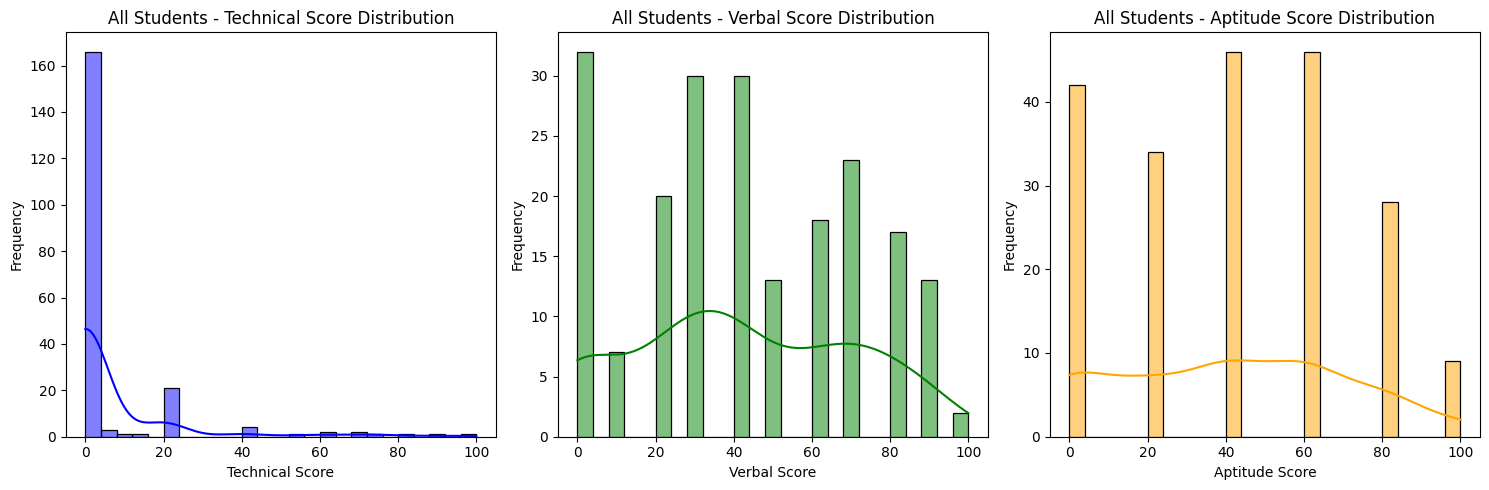

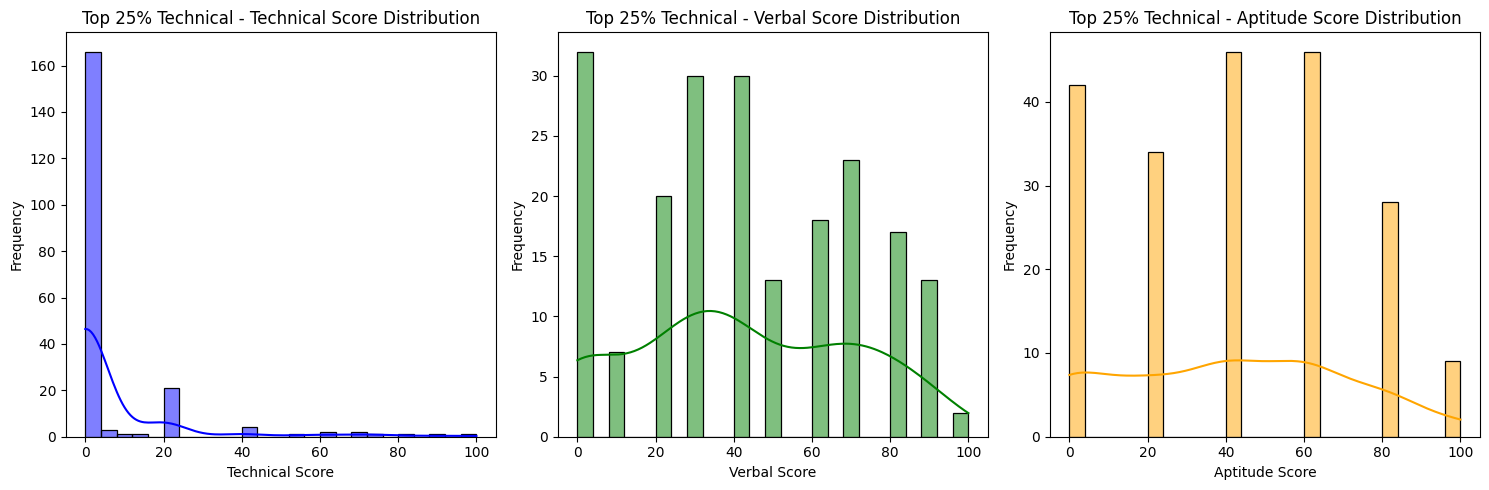

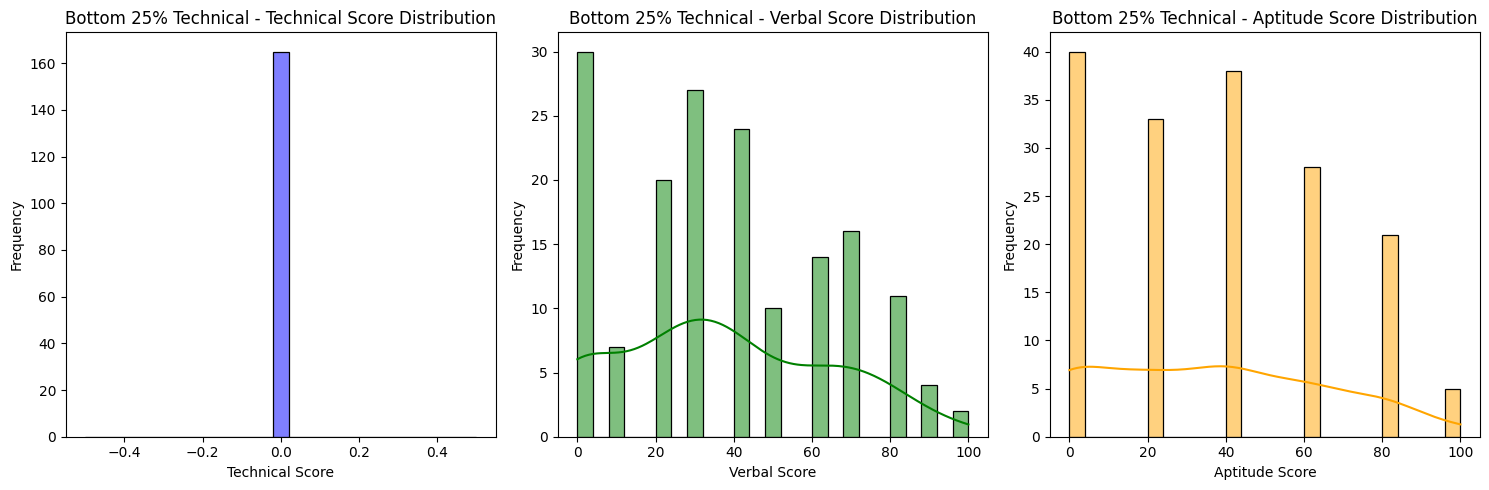

<ipython-input-71-9c1e0144faa3>:342: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", size=12)
<ipython-input-71-9c1e0144faa3>:345: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", style='B', size=16)
<ipython-input-71-9c1e0144faa3>:346: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
<ipython-input-71-9c1e0144faa3>:346: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
<ipython-input-71-9c1e0144faa3>:350: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated

'/content/job_readiness_test_pc_report_GCE.pdf'

<Figure size 1800x600 with 0 Axes>

In [71]:
#Code Cell for PC/Laptop JRT test

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
import tempfile
import os

# Steps:
#   1.Upload the Excel file in Google Colab Drive
#   2.Copy past the path (Copy Path)
#   3.Add College Name
#   4.Run the file
#.  5.Download the report from Google Colab Drive

data = pd.read_excel('/content/report-upgrad-job-readiness-test-gce-2024-11-25-problemwise.xlsx')
college_name = "GCE"



# IMP : Do not edit below Code.

passing_criteria = 60

aptitude_columns = [
    "Aptitude Problem 01(Multiple-choice) - Candidate Score",
    "Aptitude Problem 02(Multiple-choice) - Candidate Score",
    "Aptitude Problem 03(Multiple-choice) - Candidate Score",
    "Aptitude Problem 04(Multiple-choice) - Candidate Score",
    "Aptitude Problem 05(Multiple-choice) - Candidate Score",
    "Aptitude Problem 06(Multiple-choice) - Candidate Score",
    "Aptitude Problem 07(Multiple-choice) - Candidate Score",
    "Aptitude Problem 08(Multiple-choice) - Candidate Score",
    "Aptitude Problem 09(Multiple-choice) - Candidate Score",
    "Aptitude Problem 10(Multiple-choice) - Candidate Score"
]

aptitude_max_columns = [
    "Aptitude Problem 01(Multiple-choice) - Max Score",
    "Aptitude Problem 02(Multiple-choice) - Max Score",
    "Aptitude Problem 03(Multiple-choice) - Max Score",
    "Aptitude Problem 04(Multiple-choice) - Max Score",
    "Aptitude Problem 05(Multiple-choice) - Max Score",
    "Aptitude Problem 06(Multiple-choice) - Max Score",
    "Aptitude Problem 07(Multiple-choice) - Max Score",
    "Aptitude Problem 08(Multiple-choice) - Max Score",
    "Aptitude Problem 09(Multiple-choice) - Max Score",
    "Aptitude Problem 10(Multiple-choice) - Max Score"
]

# Verbal Columns (Including All Verbal Questions)
verbal_columns = [
    "Verbal Ability 16(Multiple-choice) - Candidate Score",
    "Verbal Ability 17(Multiple-choice) - Candidate Score",
    "Verbal Ability 18(Multiple-choice) - Candidate Score",
    "Verbal Ability 25(Multiple-choice) - Candidate Score",
    "Verbal Ability 06(Multiple-choice) - Candidate Score",
    "Verbal Ability 07(Multiple-choice) - Candidate Score",
    "Verbal Ability 08(Multiple-choice) - Candidate Score",
    "Verbal Ability 09(Multiple-choice) - Candidate Score",
    "Verbal Ability 11(Multiple-choice) - Candidate Score",
    "Verbal Ability 12(Multiple-choice) - Candidate Score",
    "Verbal Ability 13(Multiple-choice) - Candidate Score",
    "Verbal Ability 14(Multiple-choice) - Candidate Score",
    "Verbal Ability 15(Multiple-choice) - Candidate Score",
    "Verbal Ability 01(Multiple-choice) - Candidate Score",
    "Verbal Ability 02(Multiple-choice) - Candidate Score",
    "Verbal Ability 03(Multiple-choice) - Candidate Score",
    "Verbal Ability 04(Multiple-choice) - Candidate Score"
]

verbal_max_columns = [
    "Verbal Ability 16(Multiple-choice) - Max Score",
    "Verbal Ability 17(Multiple-choice) - Max Score",
    "Verbal Ability 18(Multiple-choice) - Max Score",
    "Verbal Ability 25(Multiple-choice) - Max Score",
    "Verbal Ability 06(Multiple-choice) - Max Score",
    "Verbal Ability 07(Multiple-choice) - Max Score",
    "Verbal Ability 08(Multiple-choice) - Max Score",
    "Verbal Ability 09(Multiple-choice) - Max Score",
    "Verbal Ability 11(Multiple-choice) - Max Score",
    "Verbal Ability 12(Multiple-choice) - Max Score",
    "Verbal Ability 13(Multiple-choice) - Max Score",
    "Verbal Ability 14(Multiple-choice) - Max Score",
    "Verbal Ability 15(Multiple-choice) - Max Score",
    "Verbal Ability 01(Multiple-choice) - Max Score",
    "Verbal Ability 02(Multiple-choice) - Max Score",
    "Verbal Ability 03(Multiple-choice) - Max Score",
    "Verbal Ability 04(Multiple-choice) - Max Score"
]

# Technical Columns (Using Best Score for Technical)
technical_columns = [
    "Trapping Rain Water(Coding) - Candidate Best Attempt Score",
    "Pattern Printing(Coding) - Candidate Best Attempt Score",
    "Reverse Words(Coding) - Candidate Best Attempt Score",
    "Kohli in ODIs(Database) - Candidate Best Attempt Score",
    "Second Maximum Number in a List(Coding) - Candidate Best Attempt Score",
    "Pascal's Triangle(Coding) - Candidate Best Attempt Score",
    "Fibonacci Series(Coding) - Candidate Best Attempt Score",
    "Armstrong Number(Coding) - Candidate Best Attempt Score",
    "Decimal to Binary(Coding) - Candidate Best Attempt Score",
    "Remove Nth Node From End of List(Coding) - Candidate Best Attempt Score",
    "Third Maximum Element in the Array(Coding) - Candidate Best Attempt Score",
    "Maximum Distance(Coding) - Candidate Best Attempt Score",
    "A Weird Sum(Coding) - Candidate Best Attempt Score",
    "Sum of Primes(Coding) - Candidate Best Attempt Score",
    "Reverse a Singly Linked List(Coding) - Candidate Best Attempt Score",
    "Reverse the Array(Coding) - Candidate Best Attempt Score",
    "Move all zeroes to end of the array(Coding) - Candidate Best Attempt Score",
    "Unique Char(Coding) - Candidate Best Attempt Score",
    "Reverse Order(Coding) - Candidate Best Attempt Score"
]

technical_max_columns = [
    "Trapping Rain Water(Coding) - Max Score",
    "Pattern Printing(Coding) - Max Score",
    "Reverse Words(Coding) - Max Score",
    "Kohli in ODIs(Database) - Max Score",
    "Second Maximum Number in a List(Coding) - Max Score",
    "Pascal's Triangle(Coding) - Max Score",
    "Fibonacci Series(Coding) - Max Score",
    "Armstrong Number(Coding) - Max Score",
    "Decimal to Binary(Coding) - Max Score",
    "Remove Nth Node From End of List(Coding) - Max Score",
    "Third Maximum Element in the Array(Coding) - Max Score",
    "Maximum Distance(Coding) - Max Score",
    "A Weird Sum(Coding) - Max Score",
    "Sum of Primes(Coding) - Max Score",
    "Reverse a Singly Linked List(Coding) - Max Score",
    "Reverse the Array(Coding) - Max Score",
    "Move all zeroes to end of the array(Coding) - Max Score",
    "Unique Char(Coding) - Max Score",
    "Reverse Order(Coding) - Max Score"
]



# Calculate total scores and maximum scores for each skill category
data['Aptitude Score'] = data[aptitude_columns].sum(axis=1)
data['Aptitude Max'] = data[aptitude_max_columns].sum(axis=1)


data['Technical Score'] = data[technical_columns].sum(axis=1)
data['Technical Max'] = data[technical_max_columns].sum(axis=1)

data['Verbal Score'] = data[verbal_columns].sum(axis=1)
data['Verbal Max'] = data[verbal_max_columns].sum(axis=1)

# Calculate overall total score and max score
data['Total Score'] = data[['Aptitude Score', 'Technical Score', 'Verbal Score']].sum(axis=1)
data['Total Max'] = data[['Aptitude Max', 'Technical Max', 'Verbal Max']].sum(axis=1)
data['Total Score Percentage'] = (data['Total Score'] / data['Total Max']) * 100

# Calculate percentage scores for each skill category
data['Aptitude %'] = (data['Aptitude Score'] / data['Aptitude Max']) * 100
data['Technical %'] = (data['Technical Score'] / data['Technical Max']) * 100
data['Verbal %'] = (data['Verbal Score'] / data['Verbal Max']) * 100

print(data['Aptitude %'])

# Visualization setup
plot_paths = []

# Function to save plots temporarily and add path to list
def save_plot_temp(fig, name):
    tmp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".png")
    fig.savefig(tmp_file.name, format="png", bbox_inches="tight")
    plot_paths.append(tmp_file.name)
    plt.close(fig)



# 1. Total Score Percentage Distribution
fig1 = plt.figure(figsize=(12, 6))
sns.histplot(data['Total Score Percentage'], kde=True, color='skyblue')
plt.title('Total Score Percentage Distribution')
plt.xlabel('Total Score Percentage')
plt.ylabel('Number of Candidates')
save_plot_temp(fig1, 'Total Score Percentage Distribution')

# 2. Average Percentage Scores by Skill Category
fig2 = plt.figure(figsize=(8, 6))
avg_category_scores = data[['Aptitude %', 'Technical %', 'Verbal %']].mean()
avg_category_scores.plot(kind='bar', color=['lightcoral', 'mediumseagreen', 'royalblue'])
plt.title('Average Percentage Scores by Skill Category')
plt.ylabel('Average Score (%)')
plt.xlabel('Skill Category')
save_plot_temp(fig2, 'Average Percentage Scores by Skill Category')



# 3. Score Distribution by Skill Category (Box plot)
fig3 = plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Aptitude %', 'Technical %', 'Verbal %']])
plt.title('Score Distribution by Skill Category (as % of Max)')
plt.ylabel('Score Percentage')
plt.xlabel('Skill Category')
# plt.ylim(0, 100)
save_plot_temp(fig3, 'Score Distribution by Skill Category')

# 4. Individual Learner Scores by Skill Category (Heatmap)
fig4 = plt.figure(figsize=(14, 8))
sns.heatmap(data[['Aptitude %', 'Technical %', 'Verbal %']], cmap="YlGnBu", annot=False)
plt.title('Individual Learner Scores by Skill Category (%)')
plt.ylabel('Learner')
plt.xlabel('Skill Category')
save_plot_temp(fig4, 'Individual Learner Scores by Skill Category')

import numpy as np
from math import pi

categories = ['Technical', 'Verbal', 'Aptitude']
avg_scores = [
    data['Technical %'].mean(),
    data['Verbal %'].mean(),
    data['Aptitude %'].mean()
]

# 5. Radar chart setup
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

avg_scores += avg_scores[:1]

fig5 = plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)

ax.set_ylim(0, 100)

# Plot data
ax.plot(angles, avg_scores, linewidth=2, linestyle='solid')
ax.fill(angles, avg_scores, 'b', alpha=0.1)
plt.title('Average Scores by Section')
# plt.show()
save_plot_temp(fig5, 'Radar Chart Setup')

#6 Ensure numeric columns are properly converted ---
data['Technical Score'] = pd.to_numeric(data['Technical Score'], errors='coerce').fillna(0)
data['Verbal Score'] = pd.to_numeric(data['Verbal Score'], errors='coerce').fillna(0)
data['Aptitude Score'] = pd.to_numeric(data['Aptitude Score'], errors='coerce').fillna(0)

# Define top and bottom 25% thresholds for Technical scores
top_25_threshold = data['Technical Score'].quantile(0.75)
bottom_25_threshold = data['Technical Score'].quantile(0.25)

# Filter for top 25% and bottom 25% based on Technical scores
top_25_technical = data[data['Technical Score'] >= top_25_threshold]
bottom_25_technical = data[data['Technical Score'] <= bottom_25_threshold]



# Function to plot distributions for a given subset of data
def plot_distributions(df, subset_name):
    fig0 = plt.figure(figsize=(15, 5))

    # Technical Score Distribution
    plt.subplot(1, 3, 1)
    sns.histplot(df['Technical Score'], bins=25, color='blue', kde=True)
    plt.title(f'{subset_name} - Technical Score Distribution')
    plt.xlabel('Technical Score')
    plt.ylabel('Frequency')

    # Verbal Score Distribution
    plt.subplot(1, 3, 2)
    sns.histplot(df['Verbal Score'], bins=25, color='green', kde=True)
    plt.title(f'{subset_name} - Verbal Score Distribution')
    plt.xlabel('Verbal Score')
    plt.ylabel('Frequency')

    # Aptitude Score Distribution
    plt.subplot(1, 3, 3)
    sns.histplot(df['Aptitude Score'], bins=25, color='orange', kde=True)
    plt.title(f'{subset_name} - Aptitude Score Distribution')
    plt.xlabel('Aptitude Score')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    save_plot_temp(fig0, f'{subset_name} Score Percentage Distribution')

# Plot distributions for All Students, Top 25%, and Bottom 25%
plot_distributions(data, "All Students")
plot_distributions(top_25_technical, "Top 25% Technical")
plot_distributions(bottom_25_technical, "Bottom 25% Technical")

# Separate Score Distribution for Technical, Verbal, and Aptitude (All Students, Top 25%, and Bottom 25%)
plt.figure(figsize=(18, 6))
#---

# Adding Insights to the PDF report

# Function to add sections with specific styles
def add_section(pdf, title, content, title_style='B', content_style=''):
    pdf.set_font("Arial", style=title_style, size=14)
    pdf.cell(200, 10, txt=title, ln=True, align='L')
    pdf.ln(5)  # Line break
    pdf.set_font("Arial", style=content_style, size=12)
    pdf.multi_cell(0, 10, txt=content)
    pdf.ln(10)  # Line break

# Function to add images to the PDF dynamically
def add_image(pdf, image_path, title, description, width=180):
    add_section(pdf, title, description, title_style='B', content_style='I')
    pdf.image(image_path, w=width)
    pdf.ln(10)

# Titles and Descriptions for Graphs
graph_details = [
    ("1. Total Score Percentage Distribution",
     "Displays the overall performance of candidates by showing the distribution of their total scores across all skill categories. The histogram with a KDE curve reveals trends in score distribution, highlighting common score ranges and overall performance.",
     plot_paths[0]),
    ("2. Average Percentage Scores by Skill Category",
     "This bar graph illustrates the average scores in Aptitude, Technical, and Verbal categories.",
     plot_paths[1]),
    ("3. Score Distribution by Skill Category (Box Plot)",
     "A box plot showing the spread of scores in each skill category. It highlights the median, range, and potential outliers, providing insights into score consistency and variability.",
     plot_paths[2]),
    # ("4. Individual Learner Scores by Skill Category (Heatmap)",
    #  "This heatmap provides a detailed look at individual scores across skill categories.",
    #  plot_paths[3]),
   ("5. Radar Chart - Average Scores by Section",
     "A radar chart comparing average scores in Technical, Verbal, and Aptitude skills. It visually shows the balance of skills and highlights areas where candidates perform well or need improvement.",
     plot_paths[4]),
    ("6. All, Top 25%, Bottom 25% students Score Distribution",
     "This plot shows the distribution of scores across Technical, Verbal, and Aptitude categories for All, top 25% and bottom 25% students.",
     plot_paths[5]),
    ("","Top 25% ",plot_paths[6]),
    ("","Bottom 25% ",plot_paths[7]),
]


# Generate PDF Report
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Set the font for the introduction text
pdf.set_font("Arial", size=12)

# Title of the report (Centered, Bold)
pdf.set_font("Arial", style='B', size=16)
pdf.cell(200, 10, txt="Job Readiness Test Report - Skill Scores Analysis", ln=True, align='C')
pdf.ln(10)

# Add the college name (Centered, Bold)
pdf.set_font("Arial", style='B', size=14)
pdf.cell(200, 10, txt=f"{college_name}", ln=True, align='C')
pdf.ln(10)

# Introduction Text (Italic)
intro_text = """
This report categorizes candidate performance across three key skill areas:
Aptitude, Technical, Verbal. By analyzing each skill area
individually, the report highlights candidates' strengths and identifies areas for
potential improvement. This breakdown aims to provide a clear understanding
of where candidates excel and where they may benefit from focused support.
Through this analysis, we seek to guide targeted educational interventions that
enhance overall learning outcomes and career readiness.
"""
add_section(pdf, "Introduction", intro_text, content_style='I')

# Add Graphs Dynamically
for title, description, img_path in graph_details:
    pdf.add_page()
    add_image(pdf, img_path, title, description)

# Add Total Score Percentage Summary
pdf.set_font("Arial", style='B', size=14)
pdf.cell(200, 10, txt="5. Total Score Percentage Summary", ln=True)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt=f"Average Total Score Percentage: {data['Total Score Percentage'].mean():.2f}%")
pdf.ln(10)

# Add Average Percentage Scores by Skill Category
add_section(pdf, "6. Average Percentage Scores by Skill Category",
            "\n".join([f"{category}: {score:.2f}%" for category, score in avg_category_scores.items()]), title_style='B')

# # Add Score Distribution by Skill Category
# add_section(pdf, "3. Score Distribution by Skill Category", "This plot shows the score distribution across all categories.", title_style='B')
# add_image(pdf, plot_paths[1])

# # Add Individual Learner Scores by Skill Category
# add_section(pdf, "4. Individual Learner Scores by Skill Category", "This heatmap displays individual learner scores by skill category.", title_style='B')
# add_image(pdf, plot_paths[3])

# Add Insights and Observations
# Dynamically generate insights from the dataset

# Performance distribution ranges
above_60 = len(data[data['Total Score Percentage'] > 60])
between_41_60 = len(data[(data['Total Score Percentage'] > 40) & (data['Total Score Percentage'] <= 60)])
between_21_40 = len(data[(data['Total Score Percentage'] > 20) & (data['Total Score Percentage'] <= 40)])
below_20 = len(data[data['Total Score Percentage'] <= 20])
total_learners = len(data)

# Skill category average scores
avg_aptitude = data['Aptitude %'].mean()
avg_technical = data['Technical %'].mean()
avg_verbal = data['Verbal %'].mean()

above_80 = len(data[data['Total Score Percentage'] > 80])
between_61_80 = len(data[(data['Total Score Percentage'] > 60) & (data['Total Score Percentage'] <= 80)])
below_60 = len(data[data['Total Score Percentage'] <= 60])

# Calculate the proctoring verdicts counts (assuming you have a 'Proctoring Verdict' column)
negligible_violations = data['Proctoring Verdict'].value_counts().get('Negligible', 0)
minor_violations = data['Proctoring Verdict'].value_counts().get('Minor', 0)
severe_violations = data['Proctoring Verdict'].value_counts().get('Severe', 0)
average_violation_minutes = data['Test Window Violation (minutes)'].mean()


# Calculate the pass/fail counts based on score
passed_students = len(data[data['Total Score Percentage'] > 60])
failed_students = len(data[data['Total Score Percentage'] <= 60])

# Score range groups
above_80 = len(data[data['Total Score Percentage'] > 80])
between_61_80 = len(data[(data['Total Score Percentage'] > 60) & (data['Total Score Percentage'] <= 80)])
between_41_60 = len(data[(data['Total Score Percentage'] > 40) & (data['Total Score Percentage'] <= 60)])
between_21_40 = len(data[(data['Total Score Percentage'] > 20) & (data['Total Score Percentage'] <= 40)])
below_20 = len(data[data['Total Score Percentage'] <= 20])

# Update the insights text dynamically
insights_text = f"""
1. Overall Performance Distribution:
- Above 80%: {above_80} learners ({(above_80 / total_learners) * 100:.2f}%)
- 61-80%: {between_61_80} learners ({(between_61_80 / total_learners) * 100:.2f}%)
- 41-60%: {between_41_60} learners ({(between_41_60 / total_learners) * 100:.2f}%)
- 21-40%: {between_21_40} learners ({(between_21_40 / total_learners) * 100:.2f}%)
- Below 20%: {below_20} learners ({(below_20 / total_learners) * 100:.2f}%)

2. Proctoring and Violations:
- Proctoring Verdicts:
  - Negligible Violations: {negligible_violations} students
  - Minor Violations: {minor_violations} students
  - Severe Violations: {severe_violations} students
- Violations:  Average Test Window Violation: {average_violation_minutes:.2f} minutes

3. Final Verdict:
- Total Candidates: {total_learners} students
- Passing Criteria: Scores above {passing_criteria}% are considered passing.
- Passed Candidates: {passed_students} students ({(passed_students / total_learners) * 100:.2f}%)
- Failed Candidates: {failed_students} students ({(failed_students / total_learners) * 100:.2f}%)
"""

# Add the section to the PDF
add_section(pdf, "7. Insights and Observations", insights_text, title_style='B', content_style='I')

# Add Suggestions and Final Remarks
suggestions_text = """
Suggestions:
- Enhanced Proctoring: Address the severity of test window violations, as candidates with "Severe" proctoring issues may need closer monitoring.
- Targeted Feedback: Give personalized feedback to low-performing candidates, especially in sections where they scored zero.

Additional Information:
We have the option to share individual score reports for each candidate. A download link to the report is available in the Excel file shared with this report.
"""
add_section(pdf, "8. Suggestions and Final Remarks", suggestions_text, title_style='B', content_style='I')

# Save the PDF report
report_path = f'/content/job_readiness_test_pc_report_{college_name}.pdf'
pdf.output(report_path)

# Clean up plot files
for path in plot_paths:
    os.remove(path)

report_path